In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Traer data
url = "https://shillerdata.com/"
html = requests.get(url).content
soup = BeautifulSoup(html, 'html.parser')
links = soup.select('a[data-ux-btn="primary"]')
url = "https:"+links[1]['href']
data = pd.read_excel(url, sheet_name="Data", skiprows=7, skipfooter=1, engine="xlrd")
data = data.dropna(axis=1, how='all')
data.index = pd.to_datetime(data.Date.astype(str), format="%Y.%m")
data = data[~data.index.duplicated(keep='first')]
data = data.drop("Date", axis=1).sort_index().iloc[:,:6]
data.columns = ["IndexPrice", "Dividends", "Earnings", "CPI", "DateFraction", "InterestRate10yr"]
data = data.drop('DateFraction', axis=1)
data

,IndexPrice,Dividends,Earnings,CPI,InterestRate10yr
Date,,,,,
1871-01-01,4.440000,0.260000,0.4,12.464061,5.320000
1871-02-01,4.500000,0.260000,0.4,12.844641,5.323333
1871-03-01,4.610000,0.260000,0.4,13.034972,5.326667
1871-04-01,4.740000,0.260000,0.4,12.559226,5.330000
1871-05-01,4.860000,0.260000,0.4,12.273812,5.333333
...,...,...,...,...,...
2025-01-01,5979.515500,75.269937,NaN,317.671000,4.630000
2025-02-01,6038.690000,75.707619,NaN,319.082000,4.450000
2025-03-01,5683.983333,76.145301,NaN,319.799000,4.280000


In [2]:
lastValues = 600  #Está en meses cada periodo, 600 => 50 años

infla = data.CPI.pct_change(12).mul(100).iloc[-lastValues:]
tasa = data.InterestRate10yr.iloc[-lastValues:]
gananciaEmpresas = data.Earnings.divide(data.IndexPrice).mul(100).iloc[-lastValues:]
dividendos = data.Dividends.divide(data.IndexPrice).mul(100).iloc[-lastValues:]

sp500_10yr = data.IndexPrice.pct_change(120).add(1).pow(1/10).sub(1).mul(100).iloc[-lastValues:]

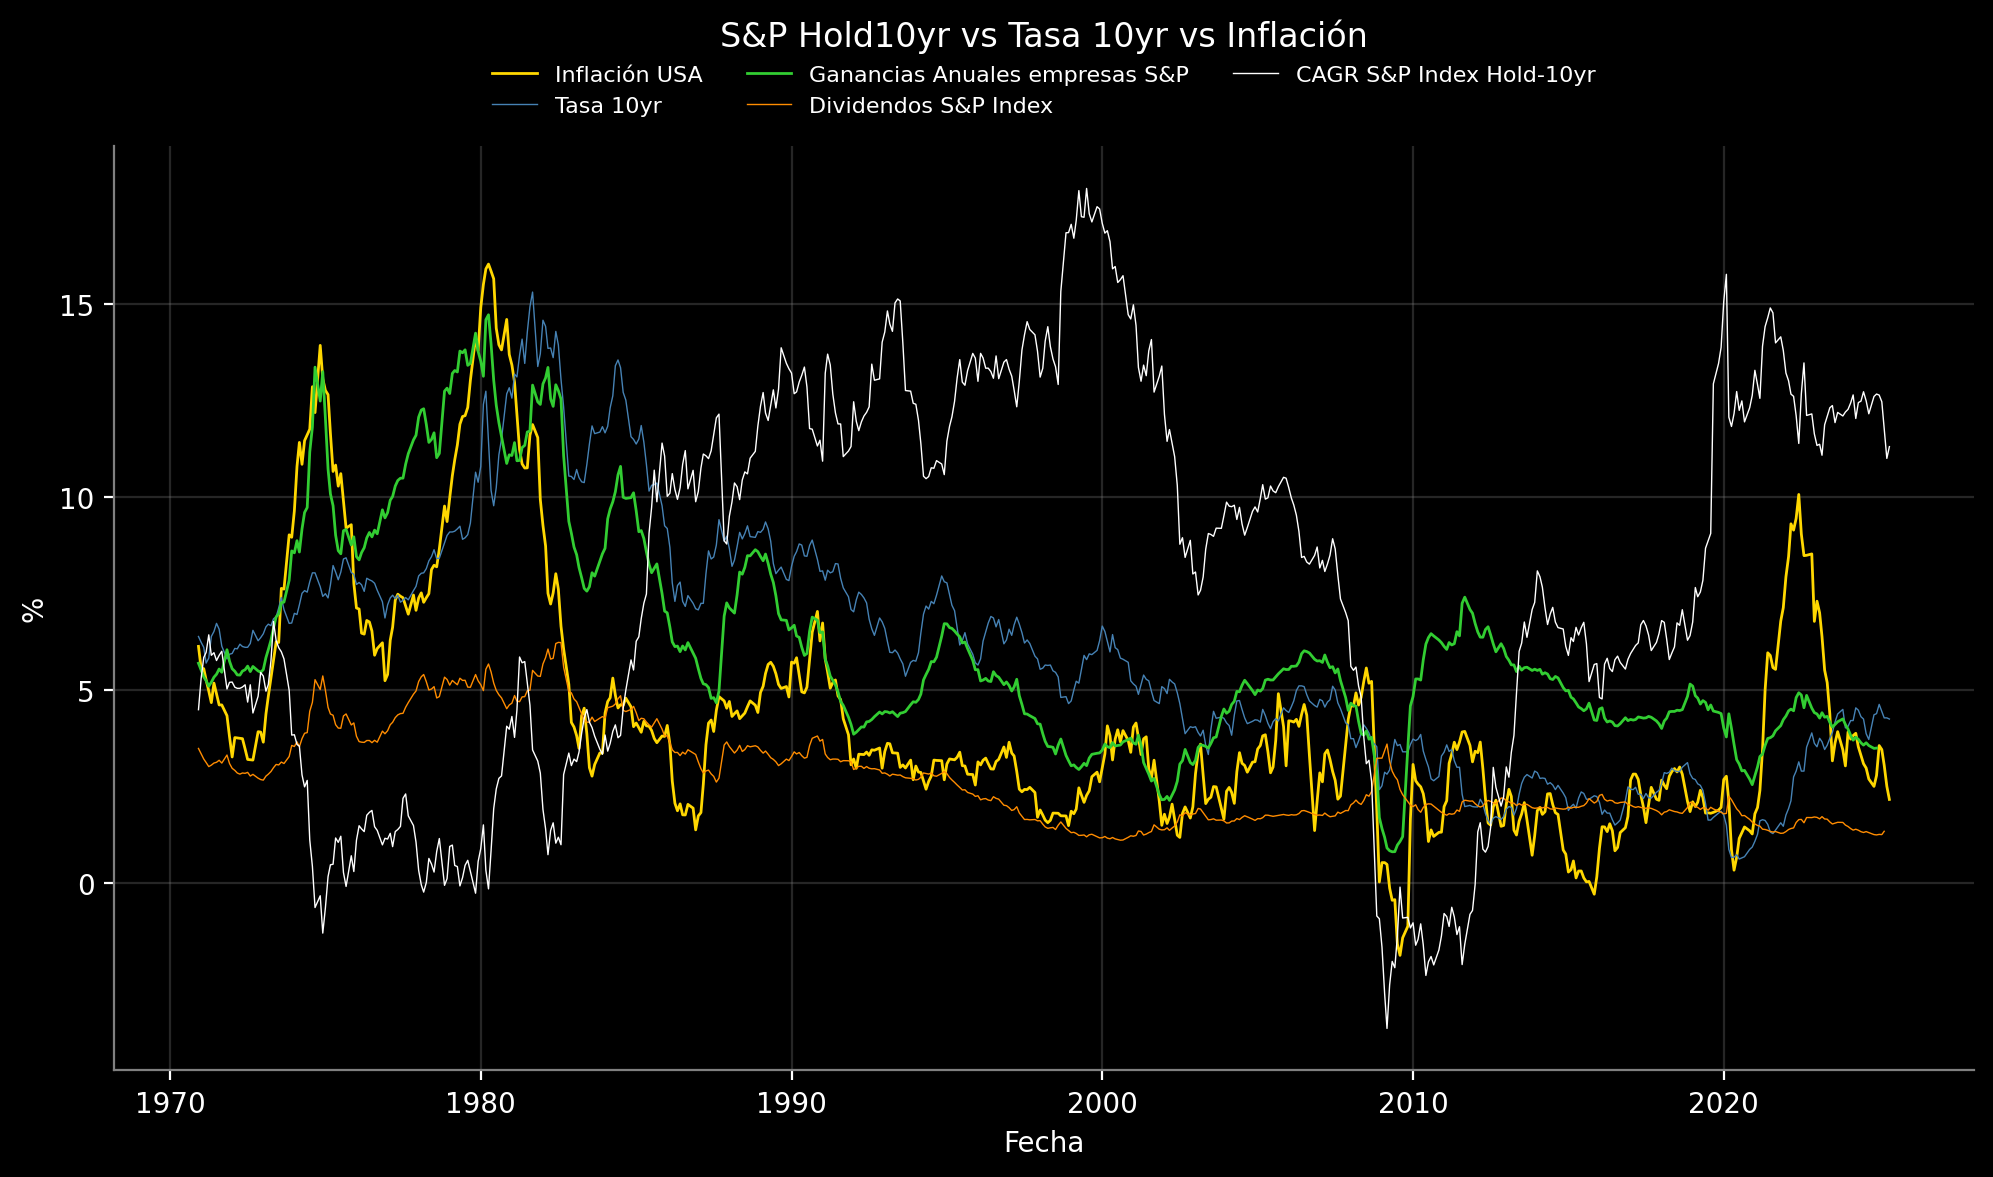

In [3]:
plt.style.use('dark_background')

colors = ['gold', 'steelblue', 'limegreen', 'darkorange', 'white']


fig, ax = plt.subplots(dpi=200, figsize=(12, 6))

ax.plot(infla, label='Inflación USA', color=colors[0], linewidth=1)
ax.plot(tasa, label='Tasa 10yr', color=colors[1], linewidth=0.5)
ax.plot(gananciaEmpresas, label='Ganancias Anuales empresas S&P', color=colors[2], linewidth=1)
ax.plot(dividendos, label='Dividendos S&P Index', color=colors[3], linewidth=0.5)
ax.plot(sp500_10yr, label='CAGR S&P Index Hold-10yr', color=colors[4], linewidth=0.5)

ax.set_ylabel('%', color='white')
ax.set_xlabel('Fecha', color='white')
ax.tick_params(colors='white')
ax.legend(frameon=False, ncols=3, loc='upper center', fontsize=8, bbox_to_anchor=(0.5, 1.11))
ax.set_title('S&P Hold10yr vs Tasa 10yr vs Inflación', y=1.09, color='white')
ax.grid(color='gray', alpha=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

plt.show()